# 环形链表2

### 给定一个链表，返回链表开始入环的第一个节点。如果链表无环，则返回null。

* 为了表示给定链表中的环，使用整数pos来表示链表尾连接到链表中的位置（索引从0开始）。如果pos是-1，则该链表没有环。

* 例如：
    * 输入：head=[3,2,0,-4], pos = 1
    * 输出：tail connects to ndoe index 1

#### 考察知识点：
* 判断链表是否有环。
* 如果有环，如何找到这个环的入口。

#### 判断链表是否有环

* 可以使用快慢指针法，分别定义fast和slow指针，从头节点出发，fast指针每次移动两个节点，slow指针每次移动一个节点，如果fast和slow指针在途中相遇，说明这个链表有环。
* 首先，fast指针一定先进入环中，如果fast指针和slow指针相遇的话，一定是在环中相遇。

#### 如果有环，如何找到这个环的入口

* 假设从头节点到环形入口节点的节点数为x。环形入口节点到fast指针与slow指针相遇节点的节点数为y。从相遇节点再到环形入口节点的节点数为z。

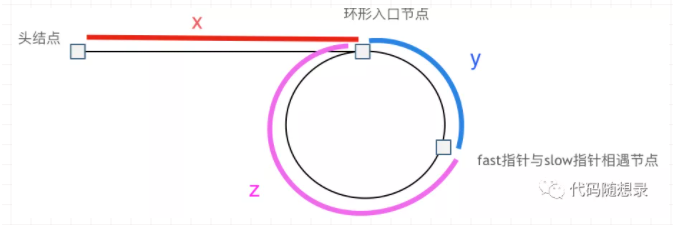

那么相遇时：slow指针走过的节点数为：`x+y`，fast指针走过的节点数为：`x+y+n(y+z)`，n为fast指针在环内走了n圈才遇到slow指针，(y+z)为一圈内节点的个数。

因为fast指针式一步走两个节点，slow指针一步走一个节点，所以fast指针走过的节点数=slow走过的节点数*2，化简得`x+y=n(y+z)`，要找环形的入口，就是求x，`x=n(y+z)-y`。整理得到`x=(n-1)(y+z)+z`。

当n=1的时候，公式就化解为`x=z`，意味着，从头节点出发一个指针，从相遇节点也出发一个指针，这两个指针每次只走一个节点，那么当这两个指针相遇的时候就是环形入口的节点。

In [1]:
class Solution(object):
    def detectCycle(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        fast = head
        slow = head
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next

            # 快慢指针相遇，此时从head和相遇点同时查找直至相遇
            if slow == fast:
                index1 = fast
                index2 = head

                while index1 != index2:
                    index1 = index1.next
                    index2 = index2.next
                return index2  # 返回环的入口

        return None